In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

%matplotlib inline

c:\users\peper\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_fwf("auto-mpg.data", colspecs = 'infer', header = None, 
                 names=['mpg',
                        'cylinders',
                        'displacement',
                        'horsepower',
                        'weight',
                        'acceleration',
                        'model_year',
                        'origin',
                        'car_name'])
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [3]:
df = df[df['horsepower']!='?']
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [4]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


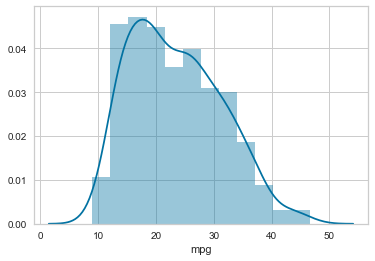

In [5]:
sns.distplot(df['mpg'])

In [8]:
X = df.drop(['mpg','car_name'],axis=1)
y = df['mpg']

features = X.columns

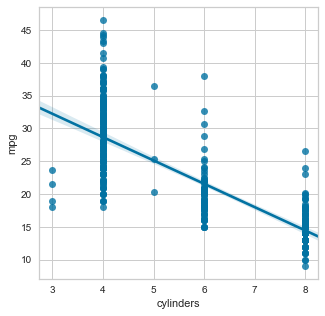

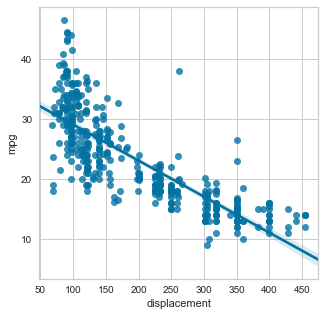

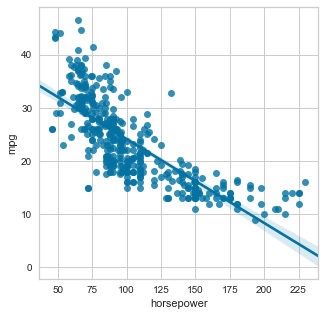

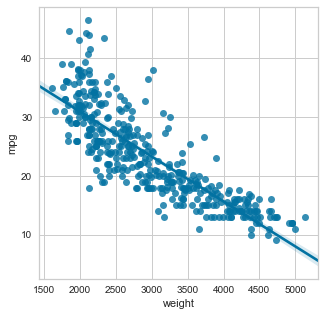

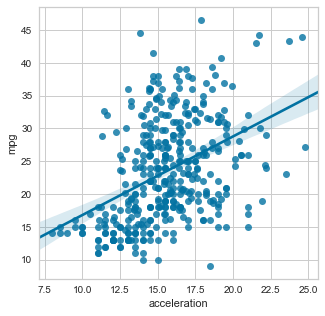

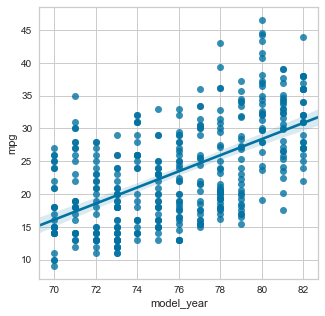

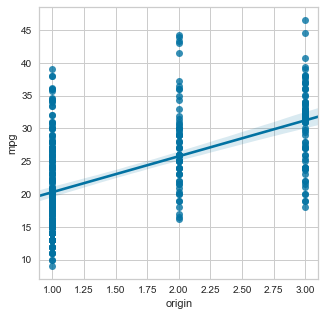

In [9]:
for feature in features:
    plt.figure(figsize=(5,5))
    sns.regplot(data=df,x=feature,y='mpg')

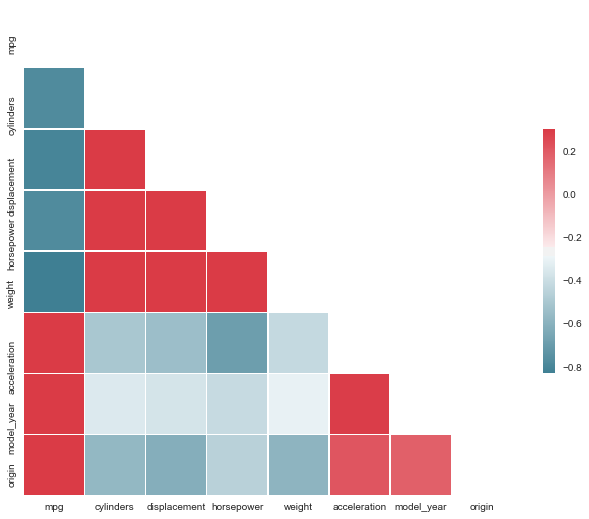

In [10]:
corr = df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=1, yticklabels=1,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
rf = RandomForestRegressor(n_estimators=50, oob_score=True, random_state=1)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9081009908553326

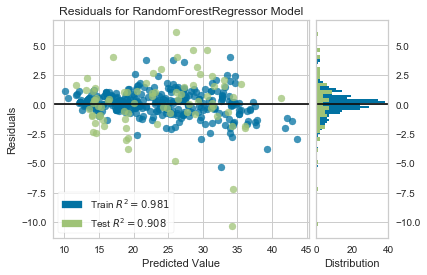

In [13]:
model = rf

visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()  

Text(0.5, 1.0, 'Feature Importance Ranking')

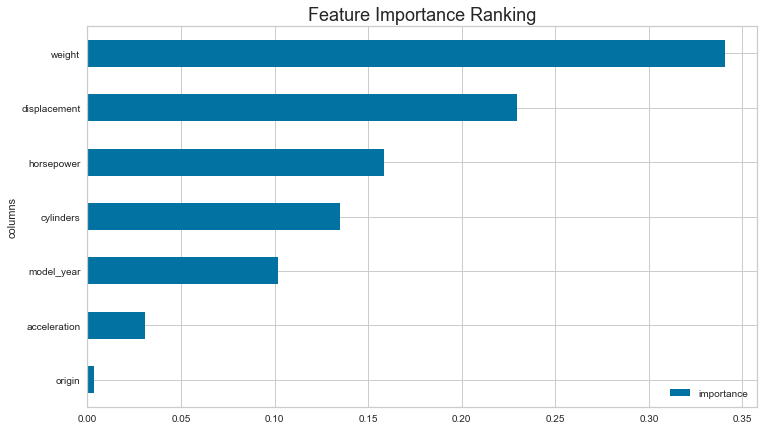

In [14]:
importance = pd.DataFrame({'columns':features,'importance': model.feature_importances_})
importance.sort_values('importance', ascending=True, inplace=True)
importance.tail(25).plot('columns','importance','barh',figsize=(12,7))
plt.title("Feature Importance Ranking", fontsize=18)

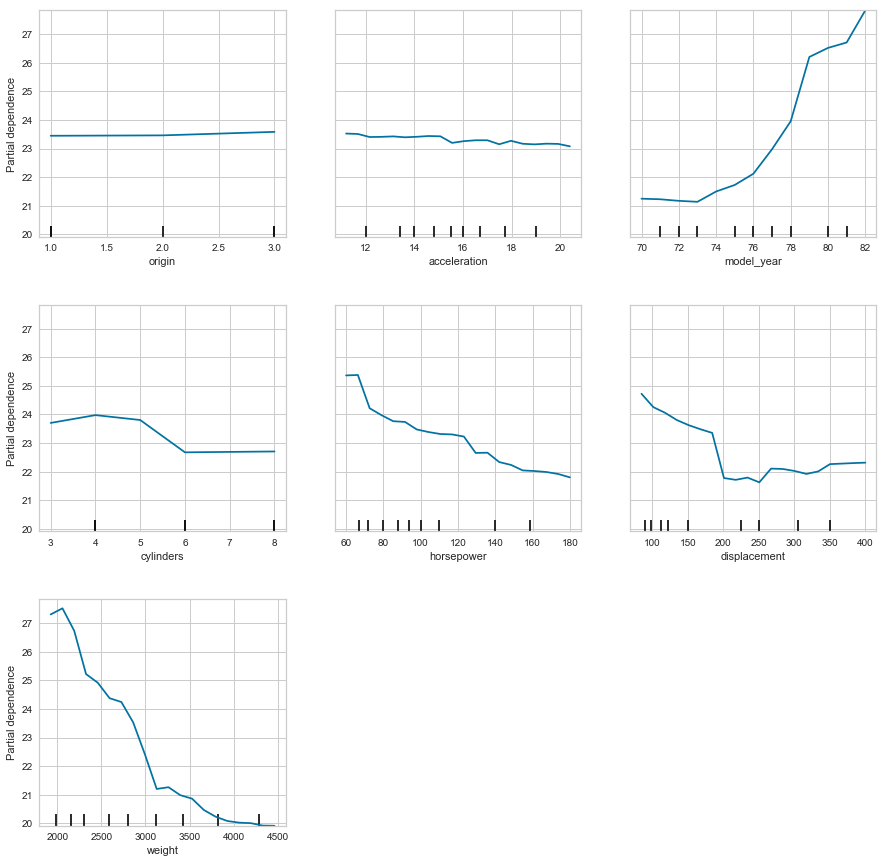

In [15]:
feature_list = importance.tail(12)['columns'].to_list()
plot_partial_dependence(model, X, feature_list, n_jobs=-1, grid_resolution=20)
fig = plt.gcf()
fig.set_size_inches(15,15)
#fig.suptitle('Partial dependence of domestic gross on top features')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

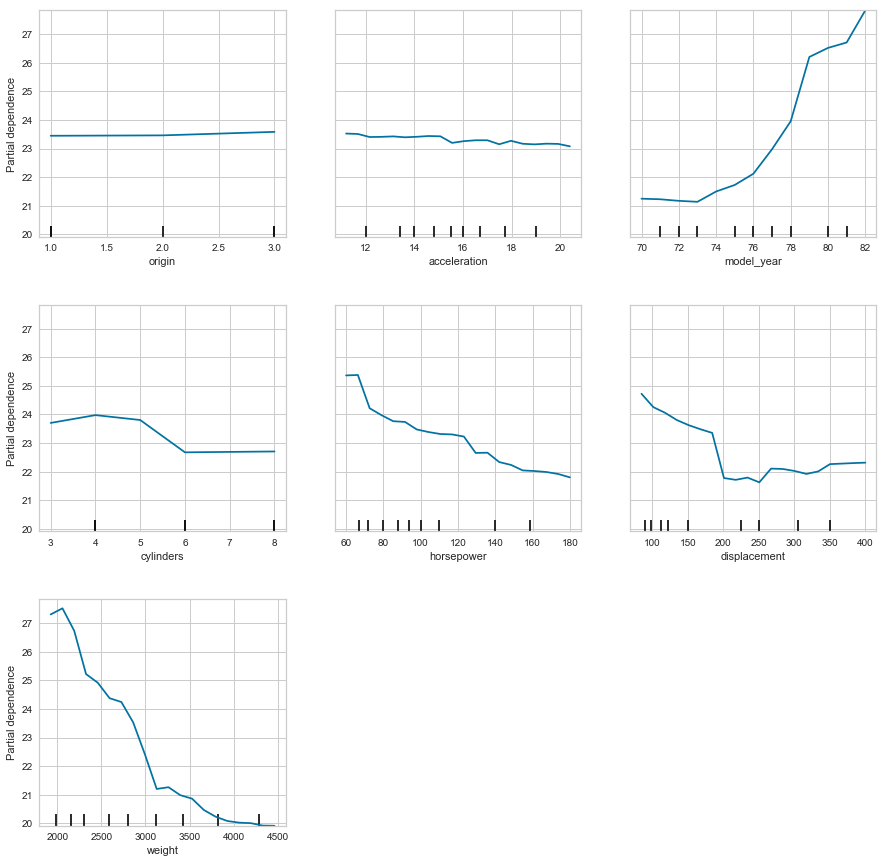

In [16]:
feature_list = importance.tail(12)['columns'].to_list()
plot_partial_dependence(model, X, feature_list, n_jobs=-1, grid_resolution=20)
fig = plt.gcf()
fig.set_size_inches(15,15)
#fig.suptitle('Partial dependence of domestic gross on top features')
fig.subplots_adjust(wspace=0.2, hspace=0.3)

In [17]:
import sys
if sys.version_info[0] < 3:
    from StringIO import StringIO
else:
    from io import StringIO

import pandas as pd

TESTDATA = StringIO("""cylinders;displacement;horsepower;weight;acceleration;model_year;origin
    8;307.0;130.0;3504.0;12.0;70;1
    """)

case = pd.read_csv(TESTDATA, sep=";")


model.predict(case)

array([17.52])